Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **35 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Joram Erbarth"
COLLABORATORS = ""

---

# CS110 Pre-class Work - The rod-cutting problem

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length $n$ of a rodand, a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1 [time estimate: 5 minutes] 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [15]:
def cut_rod(p,n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the dollars
        of revenue the company earns selling a rod of length i+1.
    n : int
        Length of the rod
    
    Returns
    -------
    q : float
        The optimal revenue
        
    """
    # YOUR CODE HERE
    if n == 0:
        return 0
    
    q = float("-inf")
    
    for i in range(1, n+1):
        q = max(q, p[i-1]+cut_rod(p,n-i))
    return q
    raise NotImplementedError()
    

In [18]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2 [time estimate: 10 minutes]

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [26]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the dollars
        of revenue the company earns selling a rod of length i+1.
    n : int
        Length of the rod
    
    Returns
    -------
    r : list of floats
        The maximum revenues. r[i] gives the maximum revenue for a rod
        of length i. As such:
        
            >>> r[0] = 0
            >>> len(r) == n + 1
            
    s : list of ints
        The optimal sizes of the first piece to cut off. Also make sure 
        that:
            
            >>> s[0] = 0
            >>> len(s) == n + 1
            
    """
    # YOUR CODE HERE
    r =[a for a in range(0, n+1)]
    s =[a for a in range(0,n+1)]
    
    r[0] = 0
    
    for j in range(1,n+1):
        q = float("-inf")
        for i in range(1, j+1):
            if q<p[i-1]+r[j-i]:
                q = p[i-1]+r[j-i]
                s[j] = i
        r[j] = q
    return r, s
        
    raise NotImplementedError()

In [30]:
def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the revenue 
        (in USD, for example) the company earns selling a rod of length i+1
    n : int
        Length of the rod
    
    Returns
    -------
    sol : a list of ints
        Indicates how to cut the rod. Cutting the rod with the lengths
        given in sol gives the optimal revenue.
        
            >>> print_cut_rod_solution(p,0) == []
            
    """
    r, s = extended_bottom_up_cut_rod(p,n)
    l = [0]
    if n != 0:
        list.append[r[n]]
        n -= r[n]
    return l
    
    # YOUR CODE HERE
    raise NotImplementedError()


In [31]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

## Part B - Experiments

## Question 1 [time estimate: 1 minute]

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for questions 2 and 3 below.


In [37]:
import numpy as np
def generate_price_list(n):
    """
    Generates a price list of length n
    
    Parameters
    ----------
    n : int
        Length of the list, must be positive
    
    Returns
    -------
    p : list
        The ordered price list for each rod cut
        
    """
    p = [1]
    for i in range(1,n):
        np.random.seed(0)
        p.append(np.random.randint(p[i-1]+1, i*3+1))
    return p

P = generate_price_list(20)
print(P)

[1, 2, 3, 8, 9, 14, 15, 20, 21, 26, 27, 32, 33, 38, 39, 44, 45, 50, 51, 56]


## Question 2 [time estimate: 5 minutes]

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009968280792236328, 0.0, 0.0038623809814453125, 0.0036308765411376953, 0.009148120880126953, 0.02512049674987793, 0.06139039993286133, 0.08254122734069824, 0.17928600311279297, 0.3310527801513672, 0.7053158283233643, 1.4124858379364014]


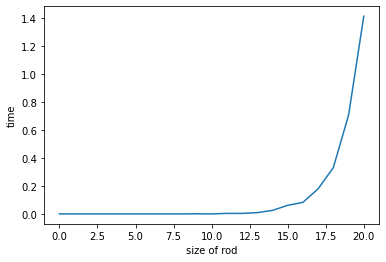

In [50]:
import time
t_c_r = []
n_list = []
for n in range(21):
    n_list.append(n)
    t1 = time.time()
    cut_rod(P,n)
    t2 = time.time() - t1
    t_c_r.append(t2)

print(t_c_r)


import matplotlib.pyplot as plt

#plot time over input size for both algorithms
plt.plot(n_list,t_c_r)
plt.xlabel("size of rod")
plt.ylabel("time")
plt.show()

## Question 3 [time estimate: 2 minutes]

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

[3.206372261047363e-06, 5.909204483032227e-06, 5.173444747924805e-06, 7.713079452514648e-06, 9.545683860778809e-06, 1.2392997741699218e-05, 1.3401269912719727e-05, 1.7403721809387206e-05, 2.324831485748291e-05, 3.09445858001709e-05, 3.330779075622559e-05, 4.00317907333374e-05, 4.261445999145508e-05, 4.553651809692383e-05, 6.341254711151123e-05, 6.89617395401001e-05, 8.232665061950684e-05, 8.369183540344238e-05, 8.824551105499267e-05, 9.811842441558838e-05, 0.00011582601070404053]


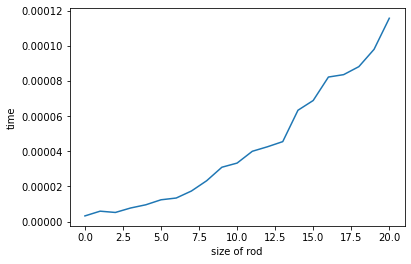

In [60]:
import time
t_b_u = []
n_list = []
for n in range(21):
    n_list.append(n)
    tt = 0
    for i in range(2000):
        t1 = time.time()
        extended_bottom_up_cut_rod(P,n)
        t2 = time.time() - t1
        tt += t2
    t_b_u.append(tt/2000)

print(t_b_u)

import matplotlib.pyplot as plt

#plot time over input size for both algorithms
plt.plot(n_list,t_b_u)
plt.xlabel("size of rod")
plt.ylabel("time")
plt.show()

## Question 4 [time estimate: 2 minutes]

Contrast both curves. What can you conclude?

We can see that the recursive approach takes more time than the bottom-up approach. The time needed to solve the recursive approach increases exponentially as n increases. We can see that the bottom up approach is faster and does not increase exponentially. It is hard to tell how exactly the bottom-up approach scales based on the plot because of the limited input size.

## Part C - After completing your experiments above, answer the following questions:

## Question 1 [time estimate: 5 minutes]
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

We know that the algorithm scales exponentially, so $t = c* 2^n-1$. We take the one value from our experiment to approximate the constant: $1.4 = c* 2^20-1$ so c= 0.000003. Now that we have the functions, we can solve for n as t is the equivalent of a million years: $3.2*10^13 = 0.000003* n^20-1$ so  n =64.  
It takes approximately a rod of size 64.

## Question 2 [time estimate: 5 minutes]
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

In [62]:
P2 = generate_price_list(64)
tt = 0
for i in range(1000):
    t1 = time.time()
    extended_bottom_up_cut_rod(P2,64)
    t2 = time.time() - t1
    tt += t2
print(tt/1000)

0.0008105742931365967


## [Optional]  Question 3 [time estimate: 5 minutes]
Do you notice anything peculiar about the solution for large n?

We can see that the exponential scaling of the recursive approach leads to extremely large times needed. We calculated that the bottom-up approach calculates in under a second what would take the recursive approach a million years. Here the different scaling behaviors have a significant impact. 